# JSON and Recursion
Agenda today:
- Introduction to JSON (Javascript Object Notation)
    - Working with JSON in Python
    - Working with a real-world dataset 
- Recursive Function
    - What is recursion?
    - Working with recursion in Python
    - Advantages of recursion



Students will be able to...
- Parse, iterate through a JSON file using the json library, and turn JSON into pandas dataframe
- Explain what a recursive vs. iterative function is

#### Why JSON/XML?
In the past, we have worked with nice, clean tabular table where the the rows are observations and columns are features, such as our housing data. However, when we are working with data collected through the web (through webscraping or an API call), the data are usually messy and in the format of a JSON or XML format. As data scientists, we are expected to know how to turn messy nested dictionary into tabular table for query, cleaning, and modeling. 

### Part I. JSON - Javascript Object Notation

In [1]:
import json
import pandas as pd

In [2]:
ls

biathlon_data.json             states_with_no_area_code.json
json_and_recursion copy.ipynb  students_info.json
states.json


#### The JSON library 
- `json.load()` - loads a json file
- `json.loads()` - loads a string

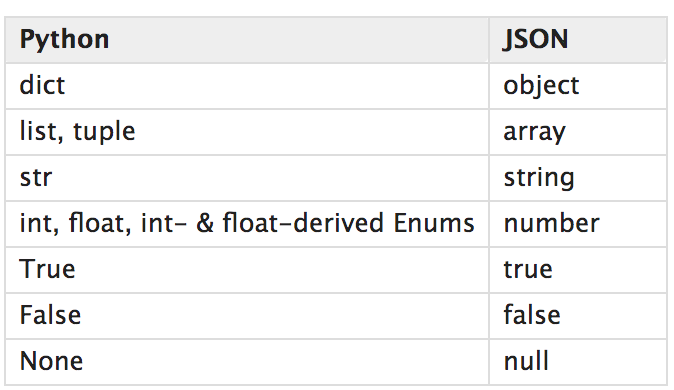

#### Example 1 - Students data

In [3]:
# load this json data using the json library 
student_json = '''
{
  "students": [
    {
      "name": "Matt",
      "major": "Finance",
      "project_grades": ["A","A-","A-","B+","A"]
    },
    {
      "name": "Natalie",
      "major": ["Neuroscience","Psychology"],
      "project_grades": ["A-","B+","A","B","A+"]
    },
    {
      "name": "Remy",
      "major": "Economics",
      "project_grades": ["A-","A-","B+","B+","A"]
    }]
}
'''

In [4]:
# this is highly illegible because it is populated with new line characters. You can use 
# various methods to clean up this data, such as regular expression. However, thanks to the
# help of the json library in python, we can read in the file as json and parse it with ease
student_json

'\n{\n  "students": [\n    {\n      "name": "Matt",\n      "major": "Finance",\n      "project_grades": ["A","A-","A-","B+","A"]\n    },\n    {\n      "name": "Natalie",\n      "major": ["Neuroscience","Psychology"],\n      "project_grades": ["A-","B+","A","B","A+"]\n    },\n    {\n      "name": "Remy",\n      "major": "Economics",\n      "project_grades": ["A-","A-","B+","B+","A"]\n    }]\n}\n'

In [5]:
# loading this file using the json library and examine is
students = json.loads(student_json)

In [6]:
students

{'students': [{'name': 'Matt',
   'major': 'Finance',
   'project_grades': ['A', 'A-', 'A-', 'B+', 'A']},
  {'name': 'Natalie',
   'major': ['Neuroscience', 'Psychology'],
   'project_grades': ['A-', 'B+', 'A', 'B', 'A+']},
  {'name': 'Remy',
   'major': 'Economics',
   'project_grades': ['A-', 'A-', 'B+', 'B+', 'A']}]}

In [7]:
# looping through this file 
for student in students['students']:
    print(student)

{'name': 'Matt', 'major': 'Finance', 'project_grades': ['A', 'A-', 'A-', 'B+', 'A']}
{'name': 'Natalie', 'major': ['Neuroscience', 'Psychology'], 'project_grades': ['A-', 'B+', 'A', 'B', 'A+']}
{'name': 'Remy', 'major': 'Economics', 'project_grades': ['A-', 'A-', 'B+', 'B+', 'A']}


In [8]:
# examine the first element
students['students'][0]

{'name': 'Matt',
 'major': 'Finance',
 'project_grades': ['A', 'A-', 'A-', 'B+', 'A']}

In [9]:
# examining the name


In [10]:
# extract information and put them all in a list 
names = []
majors = []
project_grades = []

for student in students['students']:
    names.append(student['name'])
    
majors = [students['students'][i]['major'] for i in range(len(students['students']))]

In [11]:
print(names)
print(majors)
print(project_grades)

['Matt', 'Natalie', 'Remy']
['Finance', ['Neuroscience', 'Psychology'], 'Economics']
[]


In [12]:
# what if not all lines follow the same pattern? Use exception handling!
hometown = []
for student in students['students']:
    try:
        hometown.append(student['hometown'])
    except KeyError:
        print("{} does not have hometown".format(student['name']))
        

Matt does not have hometown
Natalie does not have hometown
Remy does not have hometown


In [13]:
# turning the above json dictionary into a pandas dataframe
df = pd.DataFrame.from_dict(students['students'])

In [14]:
df.head()

,major,name,project_grades
0,Finance,Matt,"[A, A-, A-, B+, A]"
1,"[Neuroscience, Psychology]",Natalie,"[A-, B+, A, B, A+]"
2,Economics,Remy,"[A-, A-, B+, B+, A]"


In [15]:
# expand this list project_grades into its own columns 
# expand df.tags into its own dataframe
grades = df.project_grades.apply(pd.Series)
grades

,0,1,2,3,4
0,A,A-,A-,B+,A
1,A-,B+,A,B,A+
2,A-,A-,B+,B+,A


In [16]:
# rename the grades df to have more discernible column names
grades.rename(columns = lambda x:'grade_'+str(x), inplace = True)

In [17]:
grades

,grade_0,grade_1,grade_2,grade_3,grade_4
0,A,A-,A-,B+,A
1,A-,B+,A,B,A+
2,A-,A-,B+,B+,A


In [18]:
# view the new project grade df 

In [19]:
# rename the columns

# view the grade dataframe


In [20]:
#dropping the column that we don't need

In [21]:
# concat the two datasets
df = pd.concat([df, grades], axis=1).drop('project_grades', axis = 1)
df

,major,name,grade_0,grade_1,grade_2,grade_3,grade_4
0,Finance,Matt,A,A-,A-,B+,A
1,"[Neuroscience, Psychology]",Natalie,A-,B+,A,B,A+
2,Economics,Remy,A-,A-,B+,B+,A


#### Example 2 - States data

In [22]:
ls

biathlon_data.json             states_with_no_area_code.json
json_and_recursion copy.ipynb  students_info.json
states.json


In [23]:
# opening the file, reading and writing, context manager
f = open('states.json', 'r')
file = json.load(f)
f.close()

In [24]:
# context amanger
with open('states.json', 'r') as f:
    file = json.load(f)
file

{'states': [{'name': 'Alabama',
   'abbreviation': 'AL',
   'area_codes': ['205', '251', '256', '334', '938']},
  {'name': 'Alaska', 'abbreviation': 'AK', 'area_codes': ['907']},
  {'name': 'Arizona',
   'abbreviation': 'AZ',
   'area_codes': ['480', '520', '602', '623', '928']},
  {'name': 'Arkansas',
   'abbreviation': 'AR',
   'area_codes': ['479', '501', '870']},
  {'name': 'California',
   'abbreviation': 'CA',
   'area_codes': ['209',
    '213',
    '310',
    '323',
    '408',
    '415',
    '424',
    '442',
    '510',
    '530',
    '559',
    '562',
    '619',
    '626',
    '628',
    '650',
    '657',
    '661',
    '669',
    '707',
    '714',
    '747',
    '760',
    '805',
    '818',
    '831',
    '858',
    '909',
    '916',
    '925',
    '949',
    '951']},
  {'name': 'Colorado',
   'abbreviation': 'CO',
   'area_codes': ['303', '719', '720', '970']},
  {'name': 'Connecticut',
   'abbreviation': 'CT',
   'area_codes': ['203', '475', '860', '959']},
  {'name': 'Delaw

In [25]:
# examine the first element of the states data 
file['states'][0]

{'name': 'Alabama',
 'abbreviation': 'AL',
 'area_codes': ['205', '251', '256', '334', '938']}

In [26]:
# printing out all the information in the json state data
for state in file['states']:
    print(state['name'])
    print(state['abbreviation'])
    print(state['area_codes'])

Alabama
AL
['205', '251', '256', '334', '938']
Alaska
AK
['907']
Arizona
AZ
['480', '520', '602', '623', '928']
Arkansas
AR
['479', '501', '870']
California
CA
['209', '213', '310', '323', '408', '415', '424', '442', '510', '530', '559', '562', '619', '626', '628', '650', '657', '661', '669', '707', '714', '747', '760', '805', '818', '831', '858', '909', '916', '925', '949', '951']
Colorado
CO
['303', '719', '720', '970']
Connecticut
CT
['203', '475', '860', '959']
Delaware
DE
['302']
Florida
FL
['239', '305', '321', '352', '386', '407', '561', '727', '754', '772', '786', '813', '850', '863', '904', '941', '954']
Georgia
GA
['229', '404', '470', '478', '678', '706', '762', '770', '912']
Hawaii
HI
['808']
Idaho
ID
['208']
Illinois
IL
['217', '224', '309', '312', '331', '618', '630', '708', '773', '779', '815', '847', '872']
Indiana
IN
['219', '260', '317', '463', '574', '765', '812', '930']
Iowa
IA
['319', '515', '563', '641', '712']
Kansas
KS
['316', '620', '785', '913']
Kentucky
KY
['

In [27]:
# printing out all of the information of the data 

In [28]:
# deleting area code because we don't need it 
for state in file['states']:
    del state['area_codes']

In [29]:
for state in file['states']:
    print(state)

{'name': 'Alabama', 'abbreviation': 'AL'}
{'name': 'Alaska', 'abbreviation': 'AK'}
{'name': 'Arizona', 'abbreviation': 'AZ'}
{'name': 'Arkansas', 'abbreviation': 'AR'}
{'name': 'California', 'abbreviation': 'CA'}
{'name': 'Colorado', 'abbreviation': 'CO'}
{'name': 'Connecticut', 'abbreviation': 'CT'}
{'name': 'Delaware', 'abbreviation': 'DE'}
{'name': 'Florida', 'abbreviation': 'FL'}
{'name': 'Georgia', 'abbreviation': 'GA'}
{'name': 'Hawaii', 'abbreviation': 'HI'}
{'name': 'Idaho', 'abbreviation': 'ID'}
{'name': 'Illinois', 'abbreviation': 'IL'}
{'name': 'Indiana', 'abbreviation': 'IN'}
{'name': 'Iowa', 'abbreviation': 'IA'}
{'name': 'Kansas', 'abbreviation': 'KS'}
{'name': 'Kentucky', 'abbreviation': 'KY'}
{'name': 'Louisiana', 'abbreviation': 'LA'}
{'name': 'Maine', 'abbreviation': 'ME'}
{'name': 'Maryland', 'abbreviation': 'MD'}
{'name': 'Massachusetts', 'abbreviation': 'MA'}
{'name': 'Michigan', 'abbreviation': 'MI'}
{'name': 'Minnesota', 'abbreviation': 'MN'}
{'name': 'Mississipp

In [30]:
# saving the results back as a json using the json.dump() method
with open('states_with_no_area_code.json', 'w') as f:
    json.dump(file, f)

In [31]:
# turn our new states data with no area code into a dataframe

States Data Credit: [Corey Schafer](https://github.com/CoreyMSchafer/)

#### Example 3. Real data - the Biathlon Data
Data description:
Hans is the coach of the Swedish Women National Biathlon team that is currently training for the upcoming winter season. As he couldn’t travel with his team to Canada to join their training camp, he is facing the problem that some of the team members seem to be cheating on their agreed upon training schedule in order to ensure the athletes improve consistently leading up to the first competition. To track progress on their rifle shooting, the athletes have to write down their name on each target board. This week, Hans’s assistant sent him the scanned reports from Canada but many of them don’t have the names of the athletes on the target boards - now Hans can’t judge the progress of his team! He turns to you for help in building a classifier based on the named reports, that he can use to generate predictions for the reports without names. He keeps some reports with names as test data and, depending on the accuracy of your classifier on the test data, Hans will invite you to the world cup finale this winter. 

Please send back a JSON file with the same format, where each empty name string is replaced with a name of a team member, as well as a jupyter notebook that contains documentation and explanation of your approach.

In [32]:
with open('biathlon_data.json','r') as f:
    file = json.load(f)
file

{'silhouette_targets': [{'name': 'Persson',
   'shots': [{'x': 0.30481398618938044, 'y': 0.4769089569224076},
    {'x': 0.08254752672437815, 'y': 0.6231545854419579},
    {'x': -0.06570703868287404, 'y': 0.18276801307578938},
    {'x': -0.19950536224575632, 'y': 0.04277514867586857},
    {'x': -0.48209052446388273, 'y': -0.1486862587722918},
    {'x': -0.051966818786095756, 'y': -0.20272205113575173},
    {'x': 0.4761007040959099, 'y': 0.25226710985403933},
    {'x': 0.8388861454357874, 'y': 0.4382699065638803},
    {'x': -0.39174138324186564, 'y': 0.43270940550370157},
    {'x': -0.2090816799767541, 'y': 0.6042319463139916},
    {'x': -0.20956350666407814, 'y': 0.8756834553526813},
    {'x': -0.18699128521674976, 'y': 0.31834164130396214}]},
  {'name': 'Dahlmeier',
   'shots': [{'x': 0.21946660037482163, 'y': 0.293897627400934},
    {'x': 0.2945606655599632, 'y': 0.2424010485271275},
    {'x': -0.04325340451740329, 'y': 0.0014464374879283107},
    {'x': 0.10292705900243555, 'y': -0.01

In [33]:
file['silhouette_targets'][0]

{'name': 'Persson',
 'shots': [{'x': 0.30481398618938044, 'y': 0.4769089569224076},
  {'x': 0.08254752672437815, 'y': 0.6231545854419579},
  {'x': -0.06570703868287404, 'y': 0.18276801307578938},
  {'x': -0.19950536224575632, 'y': 0.04277514867586857},
  {'x': -0.48209052446388273, 'y': -0.1486862587722918},
  {'x': -0.051966818786095756, 'y': -0.20272205113575173},
  {'x': 0.4761007040959099, 'y': 0.25226710985403933},
  {'x': 0.8388861454357874, 'y': 0.4382699065638803},
  {'x': -0.39174138324186564, 'y': 0.43270940550370157},
  {'x': -0.2090816799767541, 'y': 0.6042319463139916},
  {'x': -0.20956350666407814, 'y': 0.8756834553526813},
  {'x': -0.18699128521674976, 'y': 0.31834164130396214}]}

In [34]:
df = pd.DataFrame.from_dict(file['silhouette_targets'])
df.head()

,name,shots
0,Persson,"[{'x': 0.30481398618938044, 'y': 0.47690895692..."
1,Dahlmeier,"[{'x': 0.21946660037482163, 'y': 0.29389762740..."
2,Persson,"[{'x': 0.021290847316312672, 'y': -0.167043218..."
3,Dahlmeier,"[{'x': -0.1157085563035615, 'y': -0.0319162290..."
4,Berger,"[{'x': 0.09017508203998442, 'y': 0.08436344424..."


In [35]:
shots = df.shots.apply(pd.Series)
shots.rename(columns = lambda x:'shot_'+str(x), inplace = True)

In [36]:
shots.head()

,shot_0,shot_1,shot_2,shot_3,shot_4,shot_5,shot_6,shot_7,shot_8,shot_9,shot_10,shot_11,shot_12,shot_13,shot_14
0,"{'x': 0.30481398618938044, 'y': 0.476908956922...","{'x': 0.08254752672437815, 'y': 0.623154585441...","{'x': -0.06570703868287404, 'y': 0.18276801307...","{'x': -0.19950536224575632, 'y': 0.04277514867...","{'x': -0.48209052446388273, 'y': -0.1486862587...","{'x': -0.051966818786095756, 'y': -0.202722051...","{'x': 0.4761007040959099, 'y': 0.2522671098540...","{'x': 0.8388861454357874, 'y': 0.4382699065638...","{'x': -0.39174138324186564, 'y': 0.43270940550...","{'x': -0.2090816799767541, 'y': 0.604231946313...","{'x': -0.20956350666407814, 'y': 0.87568345535...","{'x': -0.18699128521674976, 'y': 0.31834164130...",NaN,NaN,NaN
1,"{'x': 0.21946660037482163, 'y': 0.293897627400...","{'x': 0.2945606655599632, 'y': 0.2424010485271...","{'x': -0.04325340451740329, 'y': 0.00144643748...","{'x': 0.10292705900243555, 'y': -0.01965543399...","{'x': -0.04669373216970359, 'y': -0.2027984558...","{'x': 0.12038066936639433, 'y': -0.20895086050...","{'x': -0.21167849831901417, 'y': 0.23386809283...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'x': 0.021290847316312672, 'y': -0.1670432184...","{'x': 0.09986765087312557, 'y': 0.612663538136...","{'x': -0.0689470759448707, 'y': 0.196885007394...","{'x': 0.25948432853565057, 'y': 0.726872008571...","{'x': -0.2542092296622731, 'y': -0.00274112350...","{'x': 0.2098613624354706, 'y': 0.4814109699397...","{'x': 1.2084641355200865, 'y': -0.256117241520...","{'x': 0.018870246444647673, 'y': 0.23029779486...","{'x': 0.2896678257301227, 'y': 0.3257000993186...","{'x': 0.4801620026308324, 'y': 0.1645189345179...","{'x': -0.08036598308058268, 'y': 0.19193936178...",NaN,NaN,NaN,NaN
3,"{'x': -0.1157085563035615, 'y': -0.03191622906...","{'x': 0.12281557073052377, 'y': 0.115402547233...","{'x': -0.20906539674310876, 'y': -0.2642384118...","{'x': 0.21451131981042698, 'y': 0.088172894650...","{'x': -0.15764956909624214, 'y': -0.2789379117...","{'x': 0.07563117513795735, 'y': -0.03754445541...","{'x': 0.15443941582238685, 'y': 0.033549289442...","{'x': 0.06160308364203128, 'y': 0.038744503801...","{'x': 0.13715489921623966, 'y': 0.255704648138...","{'x': 0.4208440386752112, 'y': 0.3370944104500...",NaN,NaN,NaN,NaN,NaN
4,"{'x': 0.09017508203998442, 'y': 0.084363444249...","{'x': -0.0989375078378431, 'y': -0.32277188519...","{'x': 0.5466897880159899, 'y': 1.2430331686515...","{'x': 0.2879015684788779, 'y': 0.3788893251697...","{'x': 0.020714527957887932, 'y': -0.3374843019...","{'x': 0.10246623632089645, 'y': 0.066358026034...","{'x': 0.18019157848620426, 'y': 0.253691854928...","{'x': -0.13450822367245346, 'y': -0.2855978619...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
shot_0     5500 non-null object
shot_1     5500 non-null object
shot_2     5500 non-null object
shot_3     5500 non-null object
shot_4     5500 non-null object
shot_5     5500 non-null object
shot_6     5500 non-null object
shot_7     5236 non-null object
shot_8     4568 non-null object
shot_9     3735 non-null object
shot_10    2828 non-null object
shot_11    1982 non-null object
shot_12    1059 non-null object
shot_13    535 non-null object
shot_14    262 non-null object
dtypes: object(15)
memory usage: 644.6+ KB


In [38]:
shots = shots.drop(['shot_14', 'shot_13', 'shot_12', 'shot_11', 'shot_10', 'shot_9', 'shot_8', 'shot_7'], axis = 1)

In [39]:
shots.head()

,shot_0,shot_1,shot_2,shot_3,shot_4,shot_5,shot_6
0,"{'x': 0.30481398618938044, 'y': 0.476908956922...","{'x': 0.08254752672437815, 'y': 0.623154585441...","{'x': -0.06570703868287404, 'y': 0.18276801307...","{'x': -0.19950536224575632, 'y': 0.04277514867...","{'x': -0.48209052446388273, 'y': -0.1486862587...","{'x': -0.051966818786095756, 'y': -0.202722051...","{'x': 0.4761007040959099, 'y': 0.2522671098540..."
1,"{'x': 0.21946660037482163, 'y': 0.293897627400...","{'x': 0.2945606655599632, 'y': 0.2424010485271...","{'x': -0.04325340451740329, 'y': 0.00144643748...","{'x': 0.10292705900243555, 'y': -0.01965543399...","{'x': -0.04669373216970359, 'y': -0.2027984558...","{'x': 0.12038066936639433, 'y': -0.20895086050...","{'x': -0.21167849831901417, 'y': 0.23386809283..."
2,"{'x': 0.021290847316312672, 'y': -0.1670432184...","{'x': 0.09986765087312557, 'y': 0.612663538136...","{'x': -0.0689470759448707, 'y': 0.196885007394...","{'x': 0.25948432853565057, 'y': 0.726872008571...","{'x': -0.2542092296622731, 'y': -0.00274112350...","{'x': 0.2098613624354706, 'y': 0.4814109699397...","{'x': 1.2084641355200865, 'y': -0.256117241520..."
3,"{'x': -0.1157085563035615, 'y': -0.03191622906...","{'x': 0.12281557073052377, 'y': 0.115402547233...","{'x': -0.20906539674310876, 'y': -0.2642384118...","{'x': 0.21451131981042698, 'y': 0.088172894650...","{'x': -0.15764956909624214, 'y': -0.2789379117...","{'x': 0.07563117513795735, 'y': -0.03754445541...","{'x': 0.15443941582238685, 'y': 0.033549289442..."
4,"{'x': 0.09017508203998442, 'y': 0.084363444249...","{'x': -0.0989375078378431, 'y': -0.32277188519...","{'x': 0.5466897880159899, 'y': 1.2430331686515...","{'x': 0.2879015684788779, 'y': 0.3788893251697...","{'x': 0.020714527957887932, 'y': -0.3374843019...","{'x': 0.10246623632089645, 'y': 0.066358026034...","{'x': 0.18019157848620426, 'y': 0.253691854928..."


In [40]:
shots.columns

Index(['shot_0', 'shot_1', 'shot_2', 'shot_3', 'shot_4', 'shot_5', 'shot_6'], dtype='object')

In [41]:
for shot in list(shots.columns):
    split_shot = shots[shot].apply(pd.Series)
    split_shot.rename(columns = lambda x: shot+'_'+str(x), inplace = True)
    df = pd.concat([df, split_shot], axis=1)

In [42]:
df.head()

,name,shots,shot_0_x,shot_0_y,shot_1_x,shot_1_y,shot_2_x,shot_2_y,shot_3_x,shot_3_y,shot_4_x,shot_4_y,shot_5_x,shot_5_y,shot_6_x,shot_6_y
0,Persson,"[{'x': 0.30481398618938044, 'y': 0.47690895692...",0.304814,0.476909,0.082548,0.623155,-0.065707,0.182768,-0.199505,0.042775,-0.482091,-0.148686,-0.051967,-0.202722,0.476101,0.252267
1,Dahlmeier,"[{'x': 0.21946660037482163, 'y': 0.29389762740...",0.219467,0.293898,0.294561,0.242401,-0.043253,0.001446,0.102927,-0.019655,-0.046694,-0.202798,0.120381,-0.208951,-0.211678,0.233868
2,Persson,"[{'x': 0.021290847316312672, 'y': -0.167043218...",0.021291,-0.167043,0.099868,0.612664,-0.068947,0.196885,0.259484,0.726872,-0.254209,-0.002741,0.209861,0.481411,1.208464,-0.256117
3,Dahlmeier,"[{'x': -0.1157085563035615, 'y': -0.0319162290...",-0.115709,-0.031916,0.122816,0.115403,-0.209065,-0.264238,0.214511,0.088173,-0.157650,-0.278938,0.075631,-0.037544,0.154439,0.033549
4,Berger,"[{'x': 0.09017508203998442, 'y': 0.08436344424...",0.090175,0.084363,-0.098938,-0.322772,0.546690,1.243033,0.287902,0.378889,0.020715,-0.337484,0.102466,0.066358,0.180192,0.253692


In [43]:
df = df.drop('shots', axis = 1)

In [44]:
df.head()

,name,shot_0_x,shot_0_y,shot_1_x,shot_1_y,shot_2_x,shot_2_y,shot_3_x,shot_3_y,shot_4_x,shot_4_y,shot_5_x,shot_5_y,shot_6_x,shot_6_y
0,Persson,0.304814,0.476909,0.082548,0.623155,-0.065707,0.182768,-0.199505,0.042775,-0.482091,-0.148686,-0.051967,-0.202722,0.476101,0.252267
1,Dahlmeier,0.219467,0.293898,0.294561,0.242401,-0.043253,0.001446,0.102927,-0.019655,-0.046694,-0.202798,0.120381,-0.208951,-0.211678,0.233868
2,Persson,0.021291,-0.167043,0.099868,0.612664,-0.068947,0.196885,0.259484,0.726872,-0.254209,-0.002741,0.209861,0.481411,1.208464,-0.256117
3,Dahlmeier,-0.115709,-0.031916,0.122816,0.115403,-0.209065,-0.264238,0.214511,0.088173,-0.157650,-0.278938,0.075631,-0.037544,0.154439,0.033549
4,Berger,0.090175,0.084363,-0.098938,-0.322772,0.546690,1.243033,0.287902,0.378889,0.020715,-0.337484,0.102466,0.066358,0.180192,0.253692


In [45]:
df_abs = df.iloc[:, 1:].apply(lambda x: abs(x))
df_abs = pd.concat([df.name, df_abs], axis = 1)

In [46]:
df_abs.head(10)

,name,shot_0_x,shot_0_y,shot_1_x,shot_1_y,shot_2_x,shot_2_y,shot_3_x,shot_3_y,shot_4_x,shot_4_y,shot_5_x,shot_5_y,shot_6_x,shot_6_y
0,Persson,0.304814,0.476909,0.082548,0.623155,0.065707,0.182768,0.199505,0.042775,0.482091,0.148686,0.051967,0.202722,0.476101,0.252267
1,Dahlmeier,0.219467,0.293898,0.294561,0.242401,0.043253,0.001446,0.102927,0.019655,0.046694,0.202798,0.120381,0.208951,0.211678,0.233868
2,Persson,0.021291,0.167043,0.099868,0.612664,0.068947,0.196885,0.259484,0.726872,0.254209,0.002741,0.209861,0.481411,1.208464,0.256117
3,Dahlmeier,0.115709,0.031916,0.122816,0.115403,0.209065,0.264238,0.214511,0.088173,0.157650,0.278938,0.075631,0.037544,0.154439,0.033549
4,Berger,0.090175,0.084363,0.098938,0.322772,0.546690,1.243033,0.287902,0.378889,0.020715,0.337484,0.102466,0.066358,0.180192,0.253692
5,Persson,0.524297,0.340569,0.267883,0.254407,0.269776,0.223382,0.028319,0.186837,0.165440,0.412143,0.017621,0.041760,0.176193,0.254547
6,Dahlmeier,0.009919,0.224906,0.098722,0.294784,0.085920,0.032908,0.159205,0.027389,0.087443,0.201327,0.045213,0.080348,0.325556,0.240673
7,Berger,0.237513,0.090055,0.380488,0.052750,0.109002,0.478556,0.221557,0.640630,0.533370,0.392936,0.112404,0.209405,0.511577,0.196546
8,Persson,0.527578,0.920104,0.212945,0.116510,0.139694,0.062272,0.670518,0.447808,0.491444,0.025371,0.541810,0.098229,0.443786,0.277180
9,Dahlmeier,0.014799,0.460311,0.128740,0.068427,0.083593,0.077784,0.093792,0.333113,0.231174,0.092752,0.196918,0.201767,0.239074,0.187964


In [47]:
df_abs.groupby('name')[['shot_0_x', 'shot_1_x', 'shot_2_x', 
                        'shot_3_x', 'shot_4_x', 'shot_5_x', 'shot_6_x']].mean()

,shot_0_x,shot_1_x,shot_2_x,shot_3_x,shot_4_x,shot_5_x,shot_6_x
name,,,,,,,
,0.221878,0.225447,0.224439,0.228761,0.224928,0.222809,0.228501
Berger,0.259303,0.233557,0.243288,0.246485,0.237565,0.238632,0.244617
Dahlmeier,0.169854,0.166456,0.167920,0.168018,0.160359,0.168143,0.167550
Persson,0.283123,0.271085,0.260613,0.265848,0.245592,0.251026,0.289990


In [48]:
berger_avg_off_x = df_abs.groupby('name')[['shot_0_x', 'shot_1_x', 'shot_2_x', 
                                           'shot_3_x', 'shot_4_x', 'shot_5_x', 'shot_6_x']].mean().iloc[1].mean()
berger_avg_off_y = df_abs.groupby('name')[['shot_0_y', 'shot_1_y', 'shot_2_y', 
                                           'shot_3_y', 'shot_4_y', 'shot_5_y', 'shot_6_y']].mean().iloc[1].mean()

dahlmeier_avg_off_x = df_abs.groupby('name')[['shot_0_x', 'shot_1_x', 'shot_2_x', 
                                              'shot_3_x', 'shot_4_x', 'shot_5_x', 'shot_6_x']].mean().iloc[2].mean()
dahlmeier_avg_off_y = df_abs.groupby('name')[['shot_0_y', 'shot_1_y', 'shot_2_y', 
                                              'shot_3_y', 'shot_4_y', 'shot_5_y', 'shot_6_y']].mean().iloc[2].mean()

persson_avg_off_x = df_abs.groupby('name')[['shot_0_x', 'shot_1_x', 'shot_2_x', 
                                            'shot_3_x', 'shot_4_x', 'shot_5_x', 'shot_6_x']].mean().iloc[3].mean()
persson_avg_off_y = df_abs.groupby('name')[['shot_0_y', 'shot_1_y', 'shot_2_y', 
                                            'shot_3_y', 'shot_4_y', 'shot_5_y', 'shot_6_y']].mean().iloc[3].mean()

print(berger_avg_off_x)
print(berger_avg_off_y)
print()
print(dahlmeier_avg_off_x)
print(dahlmeier_avg_off_y)
print()
print(persson_avg_off_x)
print(persson_avg_off_y)

0.24334949605809042
0.3630208416193571

0.166899885355988
0.18124598748140594

0.2667540388144104
0.29757944566955546


In [49]:
import math

berger_avg_off_tot = math.sqrt(berger_avg_off_x**2 + berger_avg_off_y**2)

dahlmeier_avg_off_tot = math.sqrt(dahlmeier_avg_off_x**2 + dahlmeier_avg_off_y**2)

persson_avg_off_tot = math.sqrt(persson_avg_off_x**2 + persson_avg_off_y**2)

print(berger_avg_off_tot)
print(dahlmeier_avg_off_tot)
print(persson_avg_off_tot)


0.4370390242092265
0.24638522624124987
0.3996388916369375


In [50]:
def avg_off_x(row):
    return sum([row['shot_0_x'], row['shot_1_x'], row['shot_2_x'], 
                 row['shot_3_x'], row['shot_4_x'], row['shot_5_x'], row['shot_6_x']]) / 7


def avg_off_y(row):
    return sum([row['shot_0_y'], row['shot_1_y'], row['shot_2_y'], 
                 row['shot_3_y'], row['shot_4_y'], row['shot_5_y'], row['shot_6_y']]) / 7

In [51]:
def add_avg(row):
    if row['name'] == 'Berger':
        return berger_avg_off_tot
    elif row['name'] == 'Dahlmeier':
        return dahlmeier_avg_off_tot
    elif row['name'] == 'Persson':
        return persson_avg_off_tot
    else:
        return math.sqrt(avg_off_x(row)**2 + avg_off_y(row)**2)

In [52]:
df['avg_off'] = df_abs.apply(lambda row: add_avg(row), axis = 1)

In [53]:
df.sample(15)

,name,shot_0_x,shot_0_y,shot_1_x,shot_1_y,shot_2_x,shot_2_y,shot_3_x,shot_3_y,shot_4_x,shot_4_y,shot_5_x,shot_5_y,shot_6_x,shot_6_y,avg_off
4544,,0.170960,0.276330,0.043077,-0.041225,-0.151161,0.029506,-0.215008,0.524007,-0.149956,0.235935,-0.381975,0.065884,-0.193315,0.514729,0.304800
4386,,0.488440,-0.270933,0.211159,-0.031511,0.305012,0.348484,0.268995,0.399348,-0.276043,-0.801266,0.158498,0.104925,0.341344,0.442090,0.450702
306,Persson,0.566519,-0.041814,0.479914,0.532112,-0.275745,0.240567,0.110539,0.982739,0.115331,0.552956,-0.472292,0.173902,-0.473003,0.429090,0.399639
3559,,0.061641,0.603815,-0.253058,0.095910,0.189948,0.078167,0.004710,0.115956,0.150740,0.263171,0.114098,0.895392,0.168488,0.197520,0.348491
1893,,0.222051,0.194639,-0.152754,-0.085328,-0.096723,-0.132033,-0.209476,-0.380288,0.095996,-0.192207,-0.338085,-0.741225,0.601174,0.808829,0.437280
2782,,0.260399,0.370782,0.116636,0.477438,0.119613,0.077938,0.074285,0.210279,-0.046378,-0.184208,0.151906,0.212865,0.315334,0.224137,0.295047
1603,,-0.539383,-0.153580,-0.070829,0.058897,0.059929,0.210289,0.130986,-0.127769,-0.365294,0.085715,0.080671,0.243007,0.066646,-0.194963,0.242430
5114,,0.073247,0.624708,0.212093,0.412955,0.056860,0.437033,0.298688,0.574815,0.130088,-0.218906,0.479899,0.755031,0.357147,0.429931,0.544201
3316,,0.386215,-0.087365,-0.134892,-0.199986,0.715581,0.739543,-0.118992,0.238837,-0.261968,-0.410231,-0.253616,-0.237263,-0.066540,-0.428144,0.434180
1270,,0.497288,-0.037917,-0.036858,-0.137710,0.111033,-0.181329,0.107844,-0.290143,-0.198859,-0.052469,0.075771,-0.377367,0.397501,0.287321,0.281840


In [55]:
def who_shot(row):
    dahlmeier_num = (dahlmeier_avg_off_tot+persson_avg_off_tot)/2
    persson_num = (persson_avg_off_tot+berger_avg_off_tot)/2
    if row['avg_off'] < dahlmeier_num:
        return 'Dahlmeier'
    elif row['avg_off'] < persson_num:
        return 'Persson'
    else:
        return 'Berger'

In [56]:
df_name_add = df.copy()
df_name_add['name'] = df_name_add.apply(lambda row: who_shot(row), axis=1)

In [58]:
df_name_add.sample(15)

,name,shot_0_x,shot_0_y,shot_1_x,shot_1_y,shot_2_x,shot_2_y,shot_3_x,shot_3_y,shot_4_x,shot_4_y,shot_5_x,shot_5_y,shot_6_x,shot_6_y,avg_off
2912,Berger,-0.062573,0.040691,0.291641,0.716441,0.533235,0.641340,0.512224,0.697373,0.028408,0.133230,-0.005454,0.013433,0.252600,0.397017,0.447445
1747,Persson,-0.041748,-0.143021,-0.052362,-0.619760,0.309720,0.558980,-0.206995,-0.249637,-0.020845,-0.451709,-0.027086,0.041319,-0.215540,-0.029990,0.324225
4864,Dahlmeier,0.257564,-0.062269,-0.216059,-0.369327,0.195466,0.228205,0.166286,-0.185554,-0.114399,-0.142781,0.173332,0.234687,0.245989,0.203624,0.282452
1792,Persson,0.440663,0.385788,0.380688,0.455302,0.021760,0.167296,0.141998,0.096940,0.177397,0.133364,-0.031113,0.424583,0.335432,0.547665,0.384024
757,Dahlmeier,0.191707,0.349473,-0.112073,-0.197903,0.023359,-0.151305,-0.181080,0.299871,0.079005,-0.146075,0.087886,-0.006202,-0.090419,-0.083438,0.207485
5201,Persson,-0.228711,-0.286453,0.465948,0.563086,-0.051520,0.172501,0.236575,0.116171,-0.292649,0.257189,0.333868,0.225187,0.131370,0.136869,0.353365
932,Dahlmeier,0.445248,0.197855,-0.193612,-0.231912,0.187287,0.068698,-0.053889,-0.041869,0.116707,0.079071,0.251258,0.421142,-0.053216,0.251415,0.261952
1179,Dahlmeier,0.048289,0.416014,0.061218,0.128192,-0.045599,0.015151,0.033537,0.129840,0.106672,-0.118970,0.210474,0.076492,-0.371246,-0.516254,0.236114
5107,Berger,0.511069,-0.097976,0.415052,0.000021,-0.233230,0.382005,0.233084,0.229703,-0.291294,-0.634992,-0.334386,0.078946,0.042067,0.920466,0.445824
203,Persson,0.020868,-0.241034,-0.145692,0.368154,-0.018623,0.353119,-0.445271,-0.218937,0.401022,-0.267707,-0.270390,-0.040265,0.633975,-0.071482,0.399639


In [61]:
for i in range(len(file['silhouette_targets'])):
    file['silhouette_targets'][i]['name'] = list(df_name_add.name)[i]
    
file

{'silhouette_targets': [{'name': 'Persson',
   'shots': [{'x': 0.30481398618938044, 'y': 0.4769089569224076},
    {'x': 0.08254752672437815, 'y': 0.6231545854419579},
    {'x': -0.06570703868287404, 'y': 0.18276801307578938},
    {'x': -0.19950536224575632, 'y': 0.04277514867586857},
    {'x': -0.48209052446388273, 'y': -0.1486862587722918},
    {'x': -0.051966818786095756, 'y': -0.20272205113575173},
    {'x': 0.4761007040959099, 'y': 0.25226710985403933},
    {'x': 0.8388861454357874, 'y': 0.4382699065638803},
    {'x': -0.39174138324186564, 'y': 0.43270940550370157},
    {'x': -0.2090816799767541, 'y': 0.6042319463139916},
    {'x': -0.20956350666407814, 'y': 0.8756834553526813},
    {'x': -0.18699128521674976, 'y': 0.31834164130396214}]},
  {'name': 'Dahlmeier',
   'shots': [{'x': 0.21946660037482163, 'y': 0.293897627400934},
    {'x': 0.2945606655599632, 'y': 0.2424010485271275},
    {'x': -0.04325340451740329, 'y': 0.0014464374879283107},
    {'x': 0.10292705900243555, 'y': -0.01

#### In class exercise:
- Use your knowledge of JSON and parsing JSON data, put the file in legible format
- Think about what is the best way to organize this data to prepare for machine learning tasks such as classification?

## Part II. Working with Recursive function
Recursion is the process of defining something in terms of itself. A recursive function executes by recursively calling itself. 


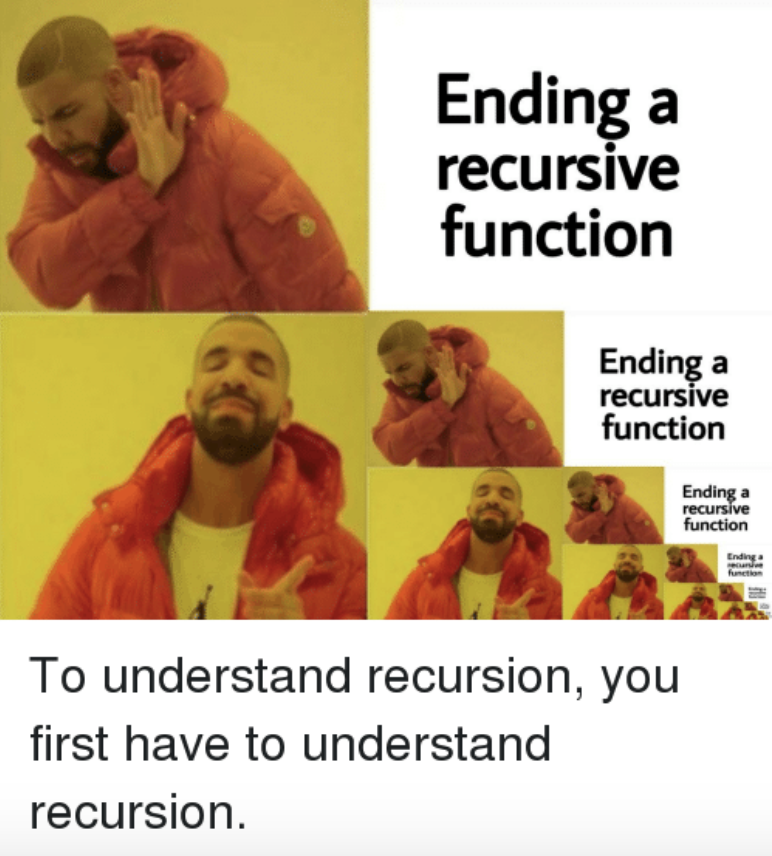

An example of recursive function: factorial(n)

In [ ]:
def calc_factorial(x):
    """This is a recursive function
    to find the factorial of an integer"""

    if x == 1:
        return 1
    else:
        return (x * calc_factorial(x-1))

num = 4
print("The factorial of", num, "is", calc_factorial(num))

#### Comparison between iterative function and recursive function 

In [1]:
#### Iterative function
grades = ["A+","B-","A+","C+","A-","A"]

def print_grades_iteratively():
    for grade in grades:
        print("The student received", grade,"on their homework")

In [2]:
print_grades_iteratively()

The student received A+ on their homework
The student received B- on their homework
The student received A+ on their homework
The student received C+ on their homework
The student received A- on their homework
The student received A on their homework


In [5]:
#### Recursive function
grades = ["A+","B-","A+","C+"]

# Each function call represents an elf doing his work 
def print_grades_recursively(grades):
    # Worker printer does its work
    if len(grades) == 1:
        grade = grades[0]
        print("The student received",grade)

    # Manager printer doing its work
    else:
        mid = len(grades) // 2
        first_half = grades[:mid]
        second_half = grades[mid:]
#         print_grades_recursively(grades[1:])

        # Divides its work among two printer
        print_grades_recursively(first_half)
        print_grades_recursively(second_half)
        
print_grades_recursively(grades)

The student received C+


### Advantages and Disadvantages of Recursive Function:

#### Advantages: 
- Recursive functions make the code look clean and elegant.
- A complex task can be broken down into simpler sub-problems using recursion.
- Sequence generation is easier with recursion than using some nested iteration.

#### Disadvantages:
- Sometimes the logic behind recursion is hard to follow through.
- Recursive calls are expensive (inefficient) as they take up a lot of memory and time.
- Recursive functions are hard to debug.

Resources:
- [recursion](https://realpython.com/python-thinking-recursively)